In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
!ls ../BlockDude/output_small_blockdude/vi_gamma_experiment.csv

../BlockDude/output_small_blockdude/vi_gamma_experiment.csv


# VI

## Small

In [6]:
df = pd.read_csv("../BlockDude/output_small_blockdude/vi_gamma_experiment.csv")

In [7]:
df.head()

,numActions,CumulativeReward,PlanningTime (ms),meanV,gamma,maxIters,trialNum
0,12021.0,-12021.0,377.272082,-9.011904,0.98,10.0,0.0
1,2052.0,-2052.0,270.343520,-12.573534,0.98,15.0,0.0
2,19.0,-19.0,311.106397,-15.509447,0.98,20.0,0.0
3,19.0,-19.0,356.798261,-17.419565,0.98,25.0,0.0
4,19.0,-19.0,293.846594,-18.033038,0.98,30.0,0.0


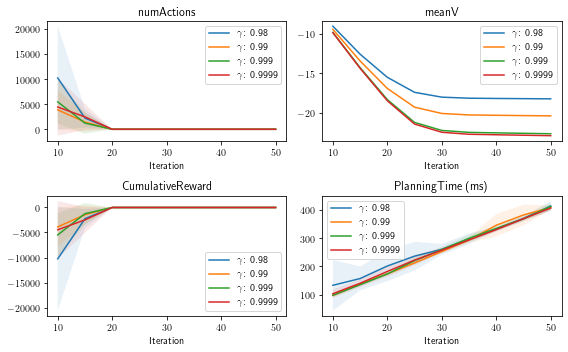

In [15]:
# df = df[df["maxIters"] > 154]
df = pd.read_csv("../BlockDude/output_small_blockdude/vi_gamma_experiment.csv")
fig, axs = plt.subplots(2, 2, figsize=(8, 5), tight_layout=True)
plt.rcParams['text.usetex'] = True
for i, metric in enumerate(["numActions", "CumulativeReward", "meanV", "PlanningTime (ms)"]):
    ax = axs[i%2][i//2]
    # ax.set_xlim(155, 170)
    # if metric == "numActions":
    #     ax.set_ylim(15, 25)
    # if metric == "CumulativeReward":
    #      ax.set_ylim(-25, 0)
    for gamma, data in df.groupby("gamma"):
        data = data.groupby("maxIters").agg({metric: ["mean", "std"]})
        ax.plot(data.index, data[metric]["mean"], label=f"$\gamma$: {gamma}")
        ax.fill_between(data.index,
                            data[metric]["mean"] + data[metric]["std"],
                            data[metric]["mean"] - data[metric]["std"],
                            alpha=0.1)
        ax.set_title(f"{metric}")
        ax.set_xlabel("Iteration")
        ax.legend()
        # ax.set_yscale("log")
# plt.show()
plt.savefig("figures/small_blockdude_gamma.png", dpi=500)

## Large

In [17]:
df = pd.read_csv("../BlockDude/output_large_blockdude/vi_gamma_experiment_just_meanV.csv")

In [30]:
df.head()

,PlanningTime (ms),meanV,gamma,maxIters,trialNum,ind,iter
0,26587.274931,-0.999859,0.98,0.0,0.0,0,0.0
1,26587.274931,-1.979652,0.98,0.0,0.0,1,1.0
2,26587.274931,-2.939714,0.98,0.0,0.0,2,2.0
3,26587.274931,-3.880442,0.98,0.0,0.0,3,3.0
4,26587.274931,-4.802290,0.98,0.0,0.0,4,4.0


In [25]:
for (gamma, trialNum), data in df.groupby(["gamma","trialNum"]):
    print(data.index.min())

0
115
346
2649


In [26]:
df["gamma"].drop_duplicates()

0       0.9800
115     0.9900
346     0.9990
2649    0.9999
Name: gamma, dtype: float64

In [29]:
m = {0.98: 0, 0.99: 115, 0.999: 346, 0.9999: 2649}
df["ind"] = df.index
df["iter"] = df.apply(lambda x: x["ind"] - m[x["gamma"]], axis=1)

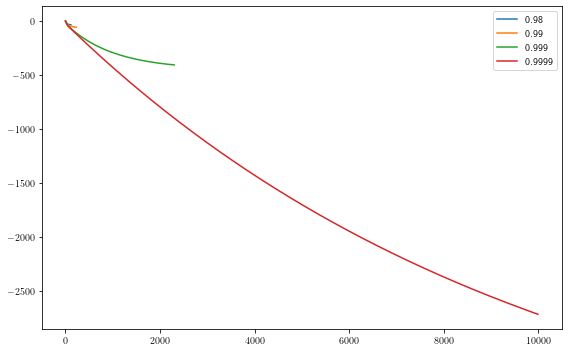

In [31]:
fig, ax = plt.subplots(figsize=(8, 5), tight_layout=True)
for gamma, data in df.groupby("gamma"):
    ax.plot(data["iter"], data["meanV"], label=gamma)
ax.legend()
    

# PI

## Small

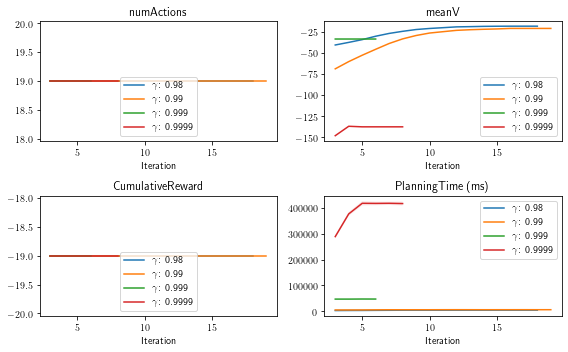

In [16]:
# df = df[df["maxIters"] > 154]
df = pd.read_csv("../BlockDude/output_small_blockdude/pi_gamma_experiment.csv")
fig, axs = plt.subplots(2, 2, figsize=(8, 5), tight_layout=True)
plt.rcParams['text.usetex'] = True
for i, metric in enumerate(["numActions", "CumulativeReward", "meanV", "PlanningTime (ms)"]):
    ax = axs[i%2][i//2]
    for gamma, data in df.groupby("gamma"):
        data = data.groupby("maxIters").agg({metric: ["mean", "std"]})
        ax.plot(data.index, data[metric]["mean"], label=f"$\gamma$: {gamma}")
        ax.fill_between(data.index,
                            data[metric]["mean"] + data[metric]["std"],
                            data[metric]["mean"] - data[metric]["std"],
                            alpha=0.1)
        ax.set_title(f"{metric}")
        ax.set_xlabel("Iteration")
        ax.legend()
        # ax.set_yscale("log")
# plt.show()
plt.savefig("figures/small_blockdude_gamma_pi.png", dpi=500)

# Q-Learning

# Small

# Large